In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

/opt/anaconda3/envs/python_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [3]:
df.job_posted_date = pd.to_datetime(df['job_posted_date'])

In [5]:
import ast
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [6]:
df_Italy_DA = df[(df['job_country'] == 'Italy' )& (df['job_title_short'] == 'Data Analyst')]

In [7]:
df_Italy_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"[sas, sas, r, python, vba, sql, java, sql serv...","{'analyst_tools': ['sas', 'spss', 'tableau', '..."
321,Data Analyst,Data Analyst Informatica PowerCenter,"Rome, Metropolitan City of Rome, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-21 13:37:45,True,False,Italy,None,NaN,NaN,Beta 80 spa,None,None
330,Data Analyst,Junior Digital Marketing Analyst,"Bologna, Metropolitan City of Bologna, Italy",via BeBee,Full-time,False,Italy,2023-07-26 13:43:55,True,False,Italy,None,NaN,NaN,Randstad Italia Spa,"[html, gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
837,Data Analyst,Junior Data Consultant - Data Analyst,"Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Contractor,False,Italy,2023-09-01 13:54:14,False,False,Italy,None,NaN,NaN,World Food Programme,"[c, python, r, sql, matplotlib, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
1306,Data Analyst,"Data Analyst, Trilogy (Remote) - $100,000/year...",Anywhere,via LinkedIn,Full-time and Contractor,True,Italy,2023-11-06 14:10:56,False,False,Italy,None,NaN,NaN,Crossover,None,None


In [8]:
df_Italy_plot = df_Italy_DA['job_location'].value_counts().head(10).to_frame()

In [10]:
df_Italy_plot

,count
job_location,
Italy,1393
"Rome, Metropolitan City of Rome Capital, Italy",867
"Milan, Metropolitan City of Milan, Italy",374
"Bologna, Metropolitan City of Bologna, Italy",239
Anywhere,160
"Florence, Metropolitan City of Florence, Italy",114
"Naples, Metropolitan City of Naples, Italy",92
"Modena, Province of Modena, Italy",73
"Padua, Province of Padua, Italy",61


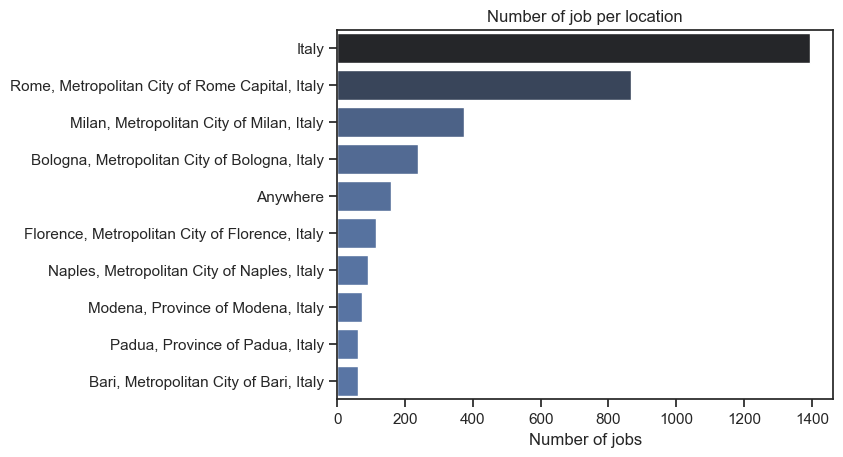

<Figure size 640x480 with 0 Axes>

In [19]:
sns.set_theme(style='ticks')
sns.barplot(data=df_Italy_plot, x='count', y='job_location', hue='count', legend=False, palette='dark:b_r')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.title('Number of job per location')
plt.show()
plt.tight_layout()

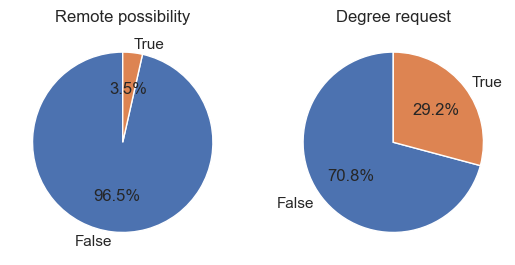

<Figure size 640x480 with 0 Axes>

In [32]:
dict_columns = {
  'job_work_from_home':'Remote possibility',
  'job_no_degree_mention': 'Degree request'
}

fig, ax = plt.subplots(1,2)

for i, (columns, title) in enumerate(dict_columns.items()):
  ax[i].pie(df_Italy_DA[columns].value_counts(), labels=(False,True), autopct='%1.1f%%', startangle=90)
  ax[i].set_title(title)

plt.show()
plt.tight_layout()

In [33]:
df_company = df_Italy_DA['company_name'].value_counts().head(10).to_frame()

In [34]:
df_company

,count
company_name,
Confidenziale,550
JobLeads GmbH,137
Adecco Italia,100
ManpowerGroup,94
GIGROUP,61
Randstad,60
Experis,56
Accenture,52
Michael Page,47


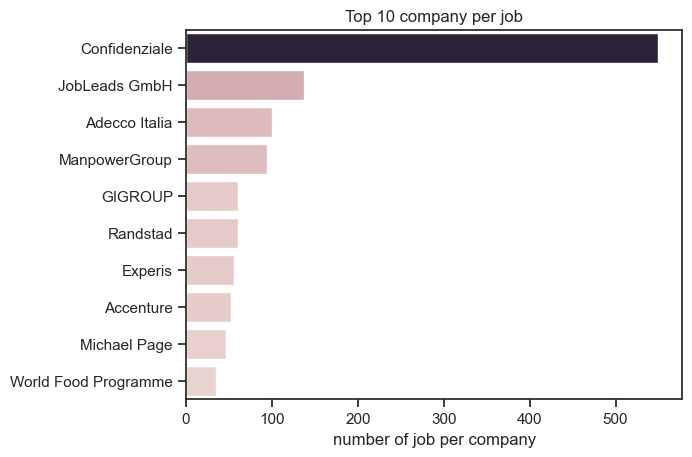

<Figure size 640x480 with 0 Axes>

In [37]:
sns.barplot(data=df_company, x='count', y='company_name', hue='count', legend=False)
plt.xlabel('number of job per company')
plt.ylabel('')
plt.title('Top 10 company per job')
plt.show()
plt.tight_layout()